<h1 style="font-size: 80px; color: blue"> 
Olivia Finder - Github Repository Example
</h1>


## 0 - Previous requirements

### Setup venv and install requirements

In [ ]:
# Olivia Finder requirements
%pip install -r requirements.txt

### Setup library path

In [2]:
# Append the path to the olivia_finder package
import sys
sys.path.append('../../olivia_finder/')

### Setup configuration

In [3]:
# Add the environment variable OLIVIA_FINDER_CONFIG_FILE_PATH
import os
os.environ['OLIVIA_FINDER_CONFIG_FILE_PATH'] = "../../olivia_finder/config.ini"

## Raw data

**Build the DataSource object**

In [4]:
from olivia_finder.data_source.repository_scrapers.github import GithubScraper
scraper = GithubScraper()

With the datasource we can obtain the repository dependencies:

In [5]:
scraper.obtain_package_data("dab0012/olivia-finder")

{'name': 'dab0012/olivia-finder',
 'version': '',
 'url': 'https://github.com/dab0012/olivia-finder',
 'dependencies': [{'name': 'inveniosoftware-contrib/intbitset',
   'version': '2.4.0',
   'url': 'https://github.com/inveniosoftware-contrib/intbitset'},
  {'name': 'matplotlib/matplotlib',
   'version': '',
   'url': 'https://github.com/matplotlib/matplotlib'},
  {'name': 'networkx/networkx',
   'version': '',
   'url': 'https://github.com/networkx/networkx'},
  {'name': 'numpy/numpy',
   'version': '1.18.5',
   'url': 'https://github.com/numpy/numpy'},
  {'name': 'pandas-dev/pandas',
   'version': '',
   'url': 'https://github.com/pandas-dev/pandas'},
  {'name': 'getanewsletter/BeautifulSoup4',
   'version': '',
   'url': 'https://github.com/getanewsletter/BeautifulSoup4'},
  {'name': 'pybraries/pybraries',
   'version': '',
   'url': 'https://github.com/pybraries/pybraries'},
  {'name': 'psf/requests',
   'version': '',
   'url': 'https://github.com/psf/requests'},
  {'name': 'Selen

In [6]:
scraper.obtain_package_data("pallets/flask")

{'name': 'pallets/flask',
 'version': '',
 'url': 'https://github.com/pallets/flask',
 'dependencies': [{'name': 'pallets/flask',
   'version': '2.3.2',
   'url': 'https://github.com/pallets/flask'},
  {'name': 'pytest-dev/pytest',
   'version': '7.3.1',
   'url': 'https://github.com/pytest-dev/pytest'},
  {'name': 'pypa/build',
   'version': '0.10.0',
   'url': 'https://github.com/pypa/build'},
  {'name': 'miku/cachetools',
   'version': '5.3.1',
   'url': 'https://github.com/miku/cachetools'},
  {'name': 'asottile/cfgv',
   'version': '3.3.1',
   'url': 'https://github.com/asottile/cfgv'},
  {'name': 'dcramer/chardet',
   'version': '5.1.0',
   'url': 'https://github.com/dcramer/chardet'},
  {'name': 'pallets/click',
   'version': '8.1.3',
   'url': 'https://github.com/pallets/click'},
  {'name': 'tartley/colorama',
   'version': '0.4.6',
   'url': 'https://github.com/tartley/colorama'},
  {'name': 'pallets/flask/blob/main/requirements/dev.txt',
   'version': 'pyproject-hooks',
   'u

## Network data

**Build the PackageManager object**

In [7]:
from olivia_finder.package_manager import PackageManager

In [8]:
github_pm = PackageManager(
    data_sources = [GithubScraper()]
)

In [9]:
github_pm.fetch_package("dab0012/olivia-finder").to_dict()

{'name': 'dab0012/olivia-finder',
 'version': '',
 'url': 'https://github.com/dab0012/olivia-finder',
 'dependencies': [{'name': 'inveniosoftware-contrib/intbitset',
   'version': '2.4.0',
   'url': None,
   'dependencies': []},
  {'name': 'matplotlib/matplotlib',
   'version': '',
   'url': None,
   'dependencies': []},
  {'name': 'networkx/networkx',
   'version': '',
   'url': None,
   'dependencies': []},
  {'name': 'numpy/numpy',
   'version': '1.18.5',
   'url': None,
   'dependencies': []},
  {'name': 'pandas-dev/pandas',
   'version': '',
   'url': None,
   'dependencies': []},
  {'name': 'getanewsletter/BeautifulSoup4',
   'version': '',
   'url': None,
   'dependencies': []},
  {'name': 'pybraries/pybraries',
   'version': '',
   'url': None,
   'dependencies': []},
  {'name': 'psf/requests', 'version': '', 'url': None, 'dependencies': []},
  {'name': 'SeleniumHQ/selenium',
   'version': '',
   'url': None,
   'dependencies': []},
  {'name': 'tqdm/tqdm', 'version': '', 'url':

In [10]:
olivia_finder_dependency_network = github_pm.get_dependency_network(
    "dab0012/olivia-finder",
    deep_level = 2,
    generate = True
)

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_degree_distribution(G, title):
    '''
    Plot the degree distribution of a networkx graph
    '''

    # Nodes' degree vector
    degree=[x[1] for x in G.degree()]
    
    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot histogram without log scale
    axs[0].hist(degree, color='r')
    axs[0].set_title(title)
    axs[0].set_xlabel('Degree')
    axs[0].set_ylabel('Number of nodes')
    
    # Plot histogram with log scale
    axs[1].hist(degree, bins=100, color='r')
    axs[1].set_title(title)
    axs[1].set_xlabel('Degree')
    axs[1].set_ylabel('Number of nodes')
    axs[1].set_xscale('log')
    axs[1].set_yscale('log')
    
    plt.show()

def draw_networkx_graph(G, layout='circular', size=(20,20)):
    '''
    Draw a networkx graph
    '''

    layouts = {
        'circular': nx.circular_layout,
        'kamada_kawai': nx.kamada_kawai_layout,
        'random': nx.random_layout,
        'shell': nx.shell_layout,
        'spring': nx.spring_layout,
    }
    plt.figure(figsize=size)
    pos = layouts[layout](G)
    node_size = [G.in_degree(node) * 80 for node in G]
    node_color = [G.in_degree(node) for node in G]
    edge_color = 'black'
    width = 1
    nx.draw_networkx(G, pos=pos, node_size=node_size, node_color=node_color, alpha=0.7,
                     with_labels=False, edge_color=edge_color, width=width)
    
    # Agregar etiquetas personalizadas
    labels = {node: node for node in G.nodes()}
    node_labels = nx.draw_networkx_labels(G, pos=pos, labels=labels, font_size=8,
                                          font_weight='bold', bbox=dict(facecolor='red', edgecolor='none', pad=0.3))

    plt.gca().set_aspect('equal')
    plt.axis('off')
    plt.show()


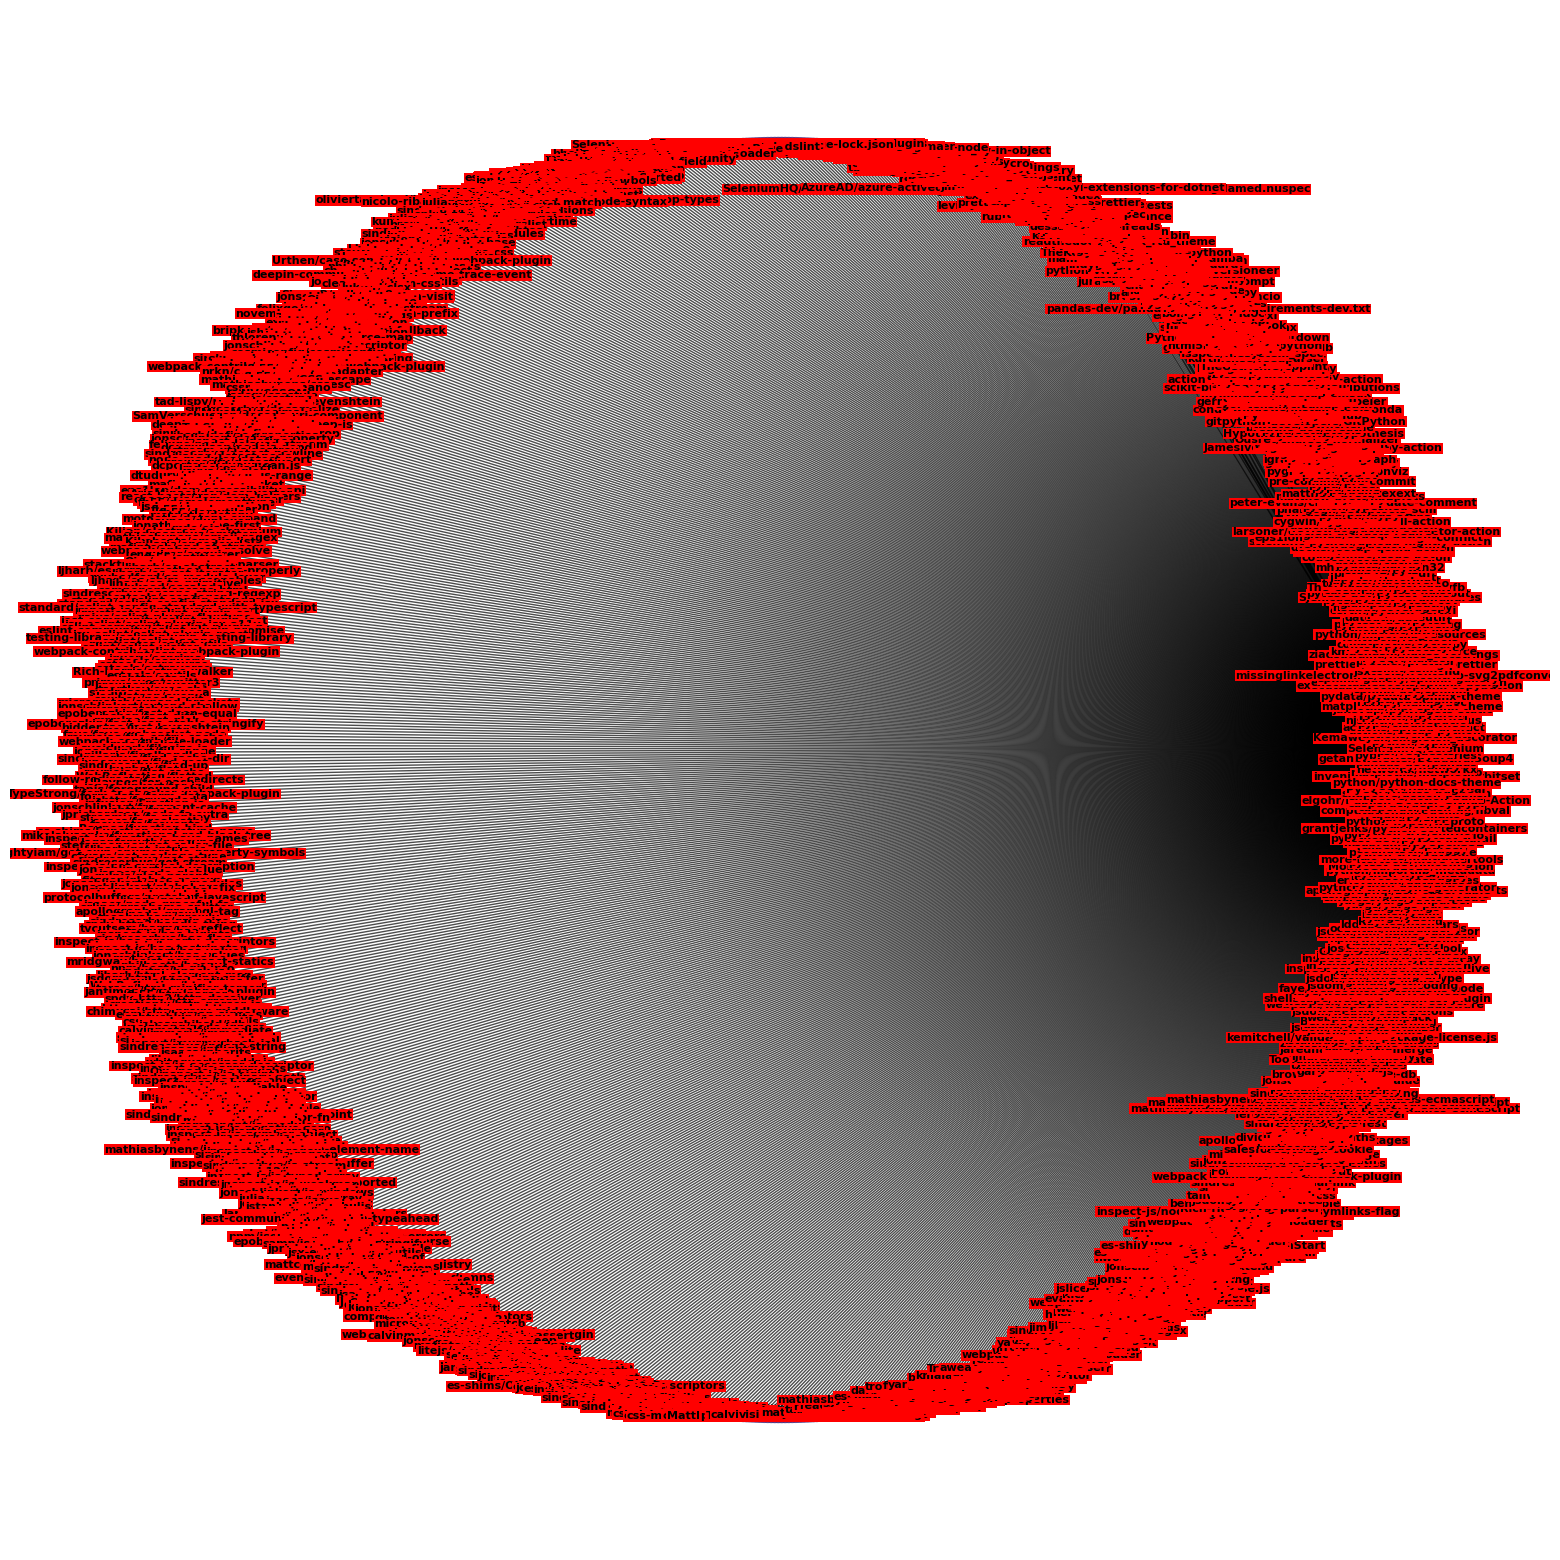

In [12]:
draw_networkx_graph(olivia_finder_dependency_network)

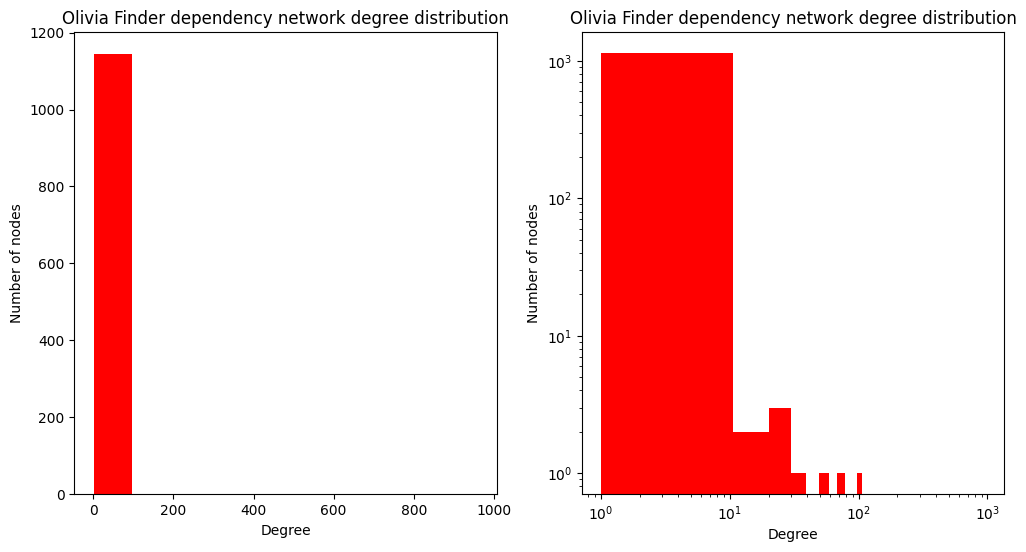

In [13]:
plot_degree_distribution(olivia_finder_dependency_network, "Olivia Finder dependency network degree distribution")

In [14]:
print("Number of nodes: ", len(olivia_finder_dependency_network.nodes))

# Top 10 most connected nodes
sorted(olivia_finder_dependency_network.degree, key=lambda x: x[1], reverse=True)[:10]


Number of nodes:  1146


[('SeleniumHQ/selenium', 960),
 ('pandas-dev/pandas', 99),
 ('matplotlib/matplotlib', 76),
 ('numpy/numpy', 50),
 ('networkx/networkx', 36),
 ('psf/requests', 26),
 ('pybraries/pybraries', 22),
 ('tqdm/tqdm', 21),
 ('dab0012/olivia-finder', 12),
 ('python/typing', 12)]

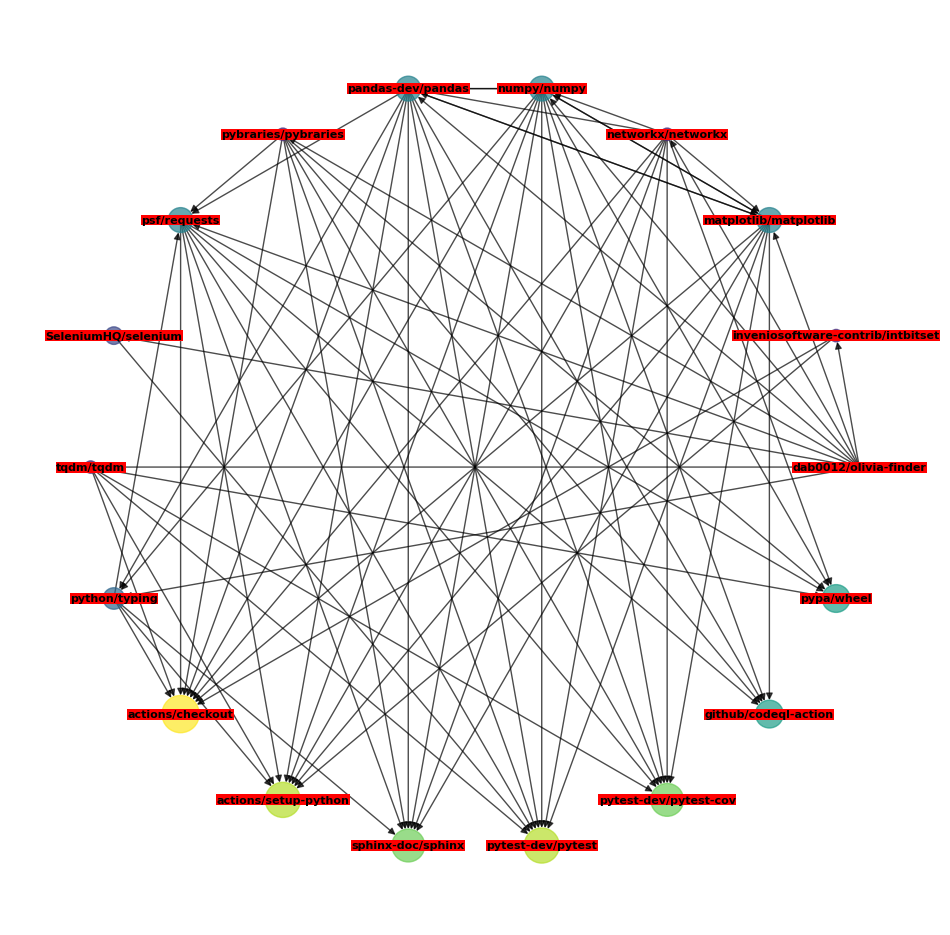

In [15]:
# Remove nodes with degree < 5
olivia_finder_dependency_network_filtered = olivia_finder_dependency_network.copy()
for node in olivia_finder_dependency_network.nodes():
    if olivia_finder_dependency_network.degree(node) < 5:
        olivia_finder_dependency_network_filtered.remove_node(node)

draw_networkx_graph(olivia_finder_dependency_network_filtered, size=(12,12))

In [16]:
flask_dependency_network = github_pm.get_dependency_network(
    "pallets/flask",
    deep_level = 2,
    generate = True
)

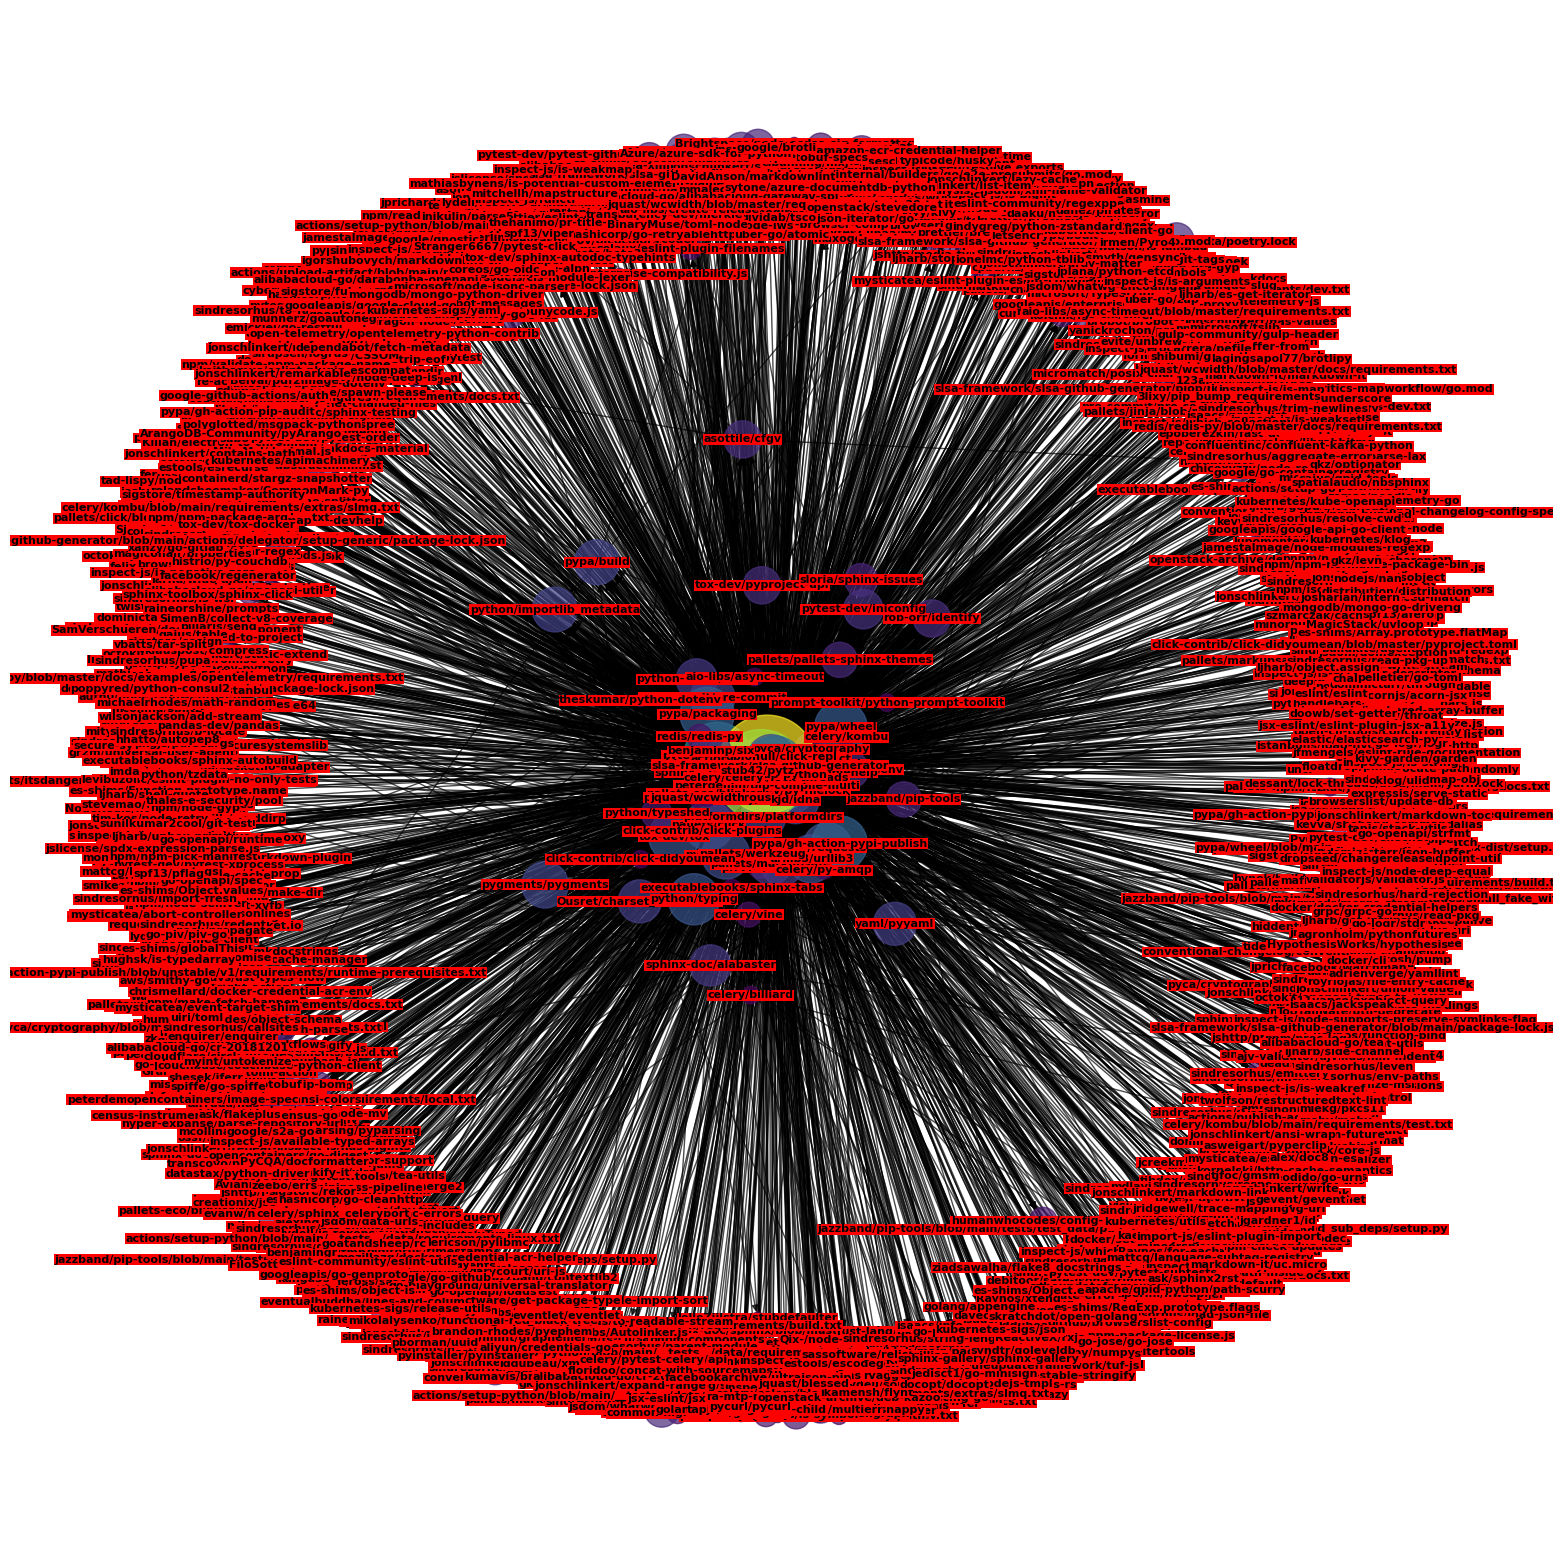

In [25]:
draw_networkx_graph(flask_dependency_network, layout='spring')

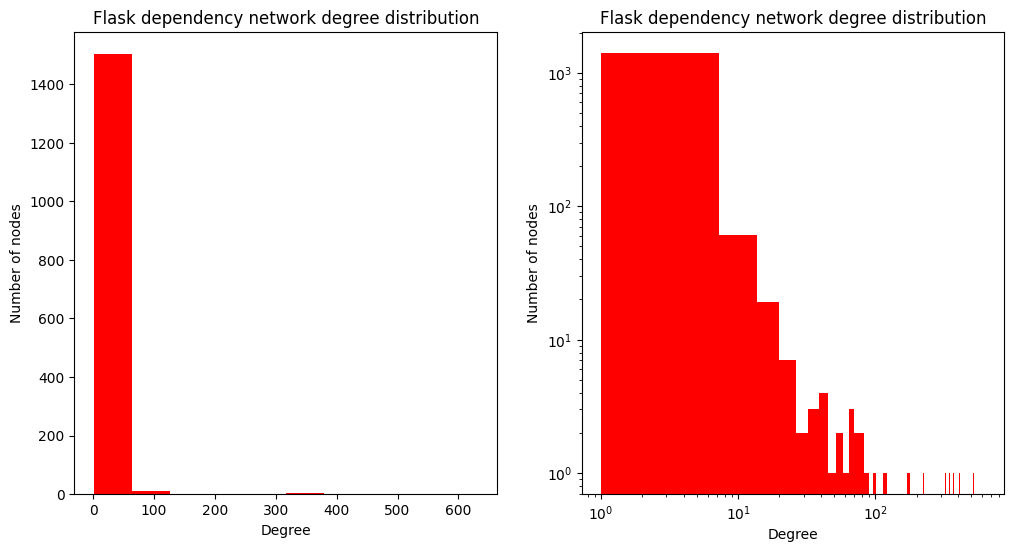

In [18]:
plot_degree_distribution(flask_dependency_network, "Flask dependency network degree distribution")

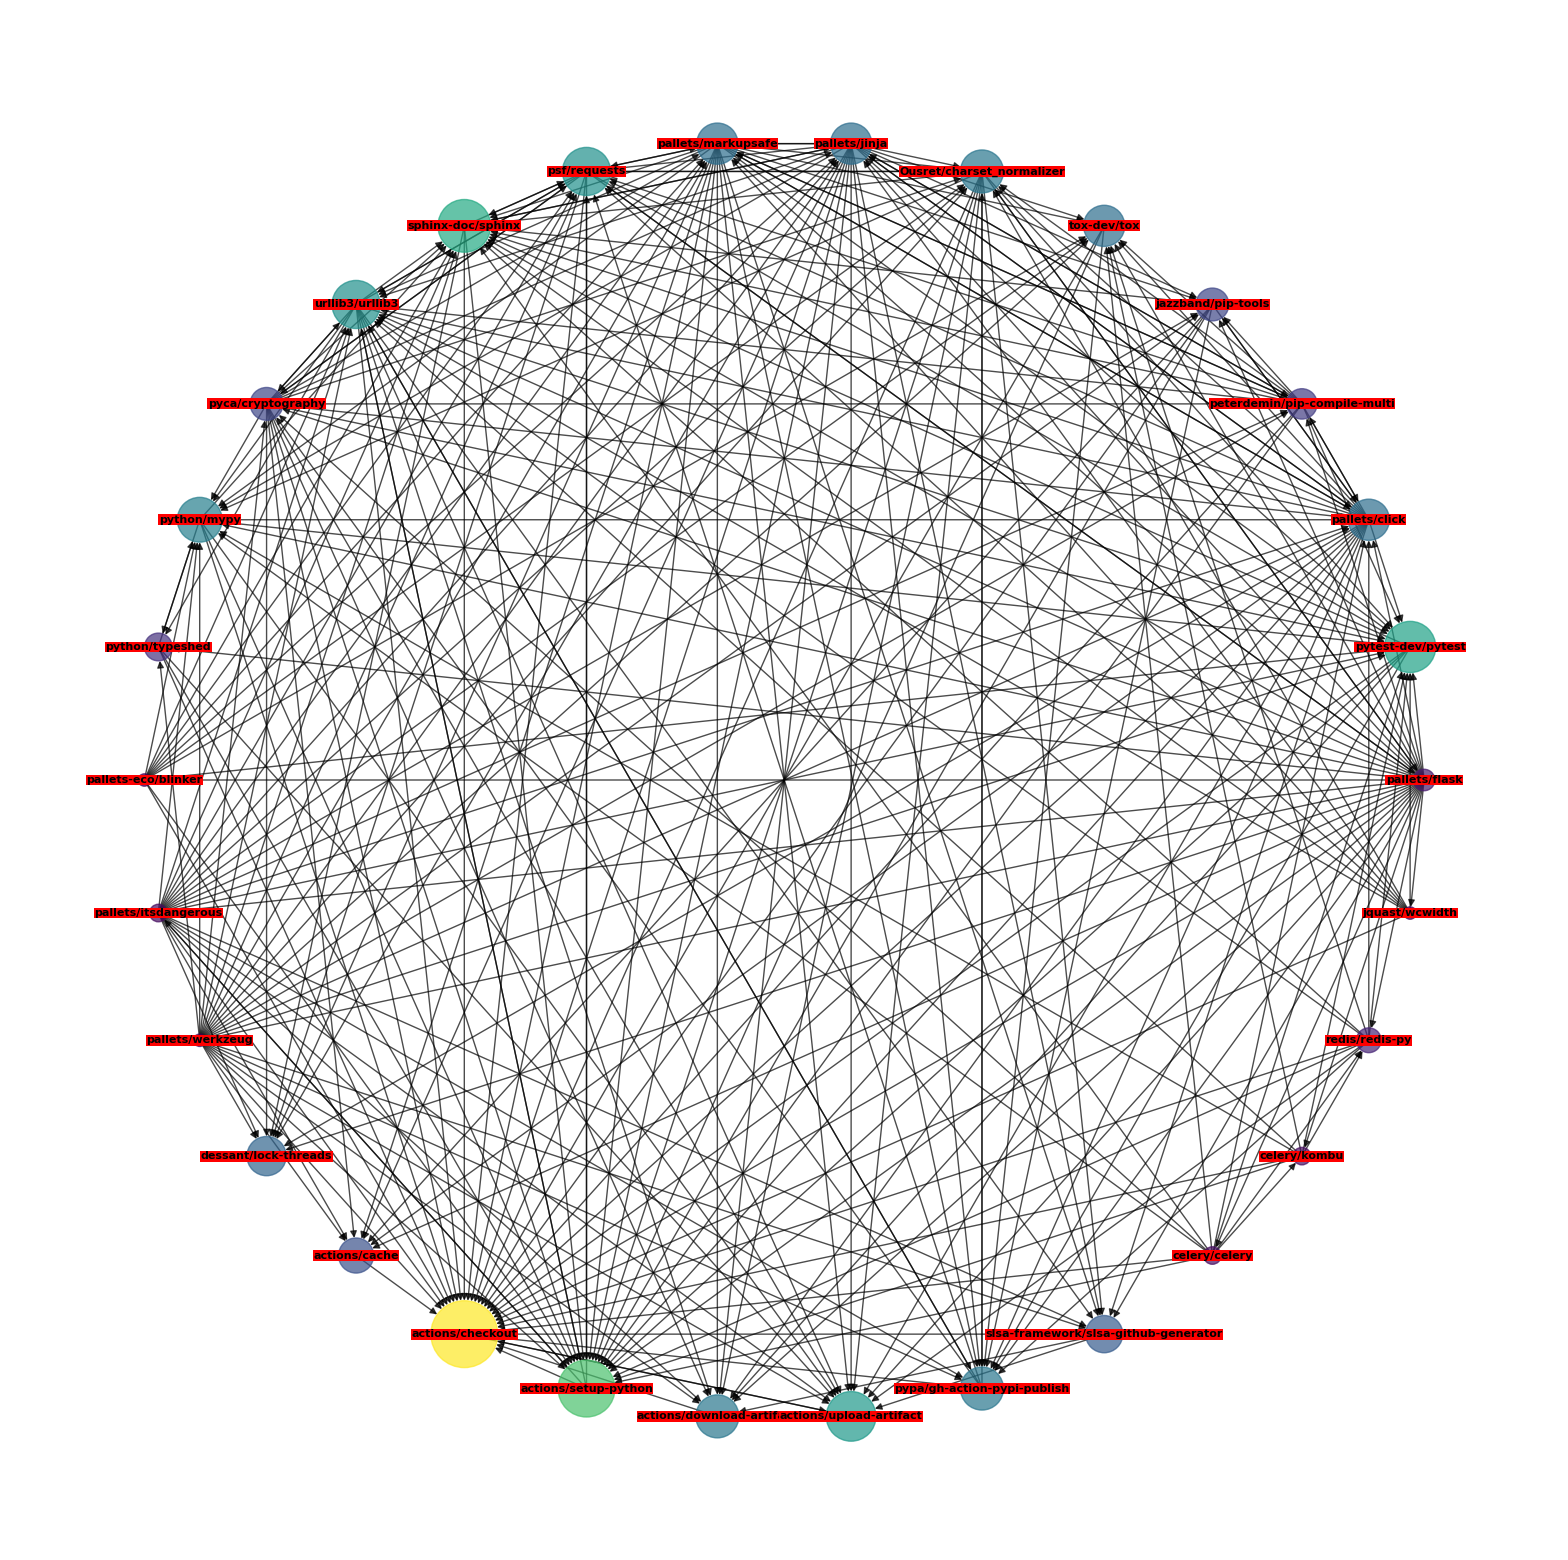

In [29]:
# Remove nodes with degree < 20

flask_dependency_network_filtered = flask_dependency_network.copy()
for node in flask_dependency_network.nodes():
    if flask_dependency_network.degree(node) < 30:
        flask_dependency_network_filtered.remove_node(node)

draw_networkx_graph(flask_dependency_network_filtered)

## Example 1: Olivia finder network

In [20]:
import networkx as nx

def bowtie_structure(network):
    """ 
    Return node set decomposition according to the bowtie structure of the input network.
    Algorithm from 
    R. Yang, L. Zhuhadar and O. Nasraoui, "Bow-tie decomposition in directed graphs",2011
    """
    
    largest_scc = max(nx.strongly_connected_components(network), key=len)
    
    # Arbitrary node from the largest SCC
    node = next(iter(largest_scc))
    
    # Reachable nodes (forward) from the largest SCC
    dfs = set(nx.dfs_tree(network,node).nodes())
    
    # Reachable nodes (backwards) from the largest SCC
    reversed_network = nx.reverse(network, copy=True)
    dfs_t = set(nx.dfs_tree(reversed_network,node).nodes())
    
    out_component = dfs - largest_scc
    in_component = dfs_t - largest_scc
    
    # Tendrils, tubes and disconnected components
    rest = set(network.nodes()) -  largest_scc - out_component - in_component

    tubes, in_tendrils, out_tendrils, disconnected  = set(), set(), set(), set()

    for v in rest:
        # in_component nodes backwards reachable from v
        irv = in_component & set(nx.dfs_tree(reversed_network, v).nodes())
        # out_component nodes reachable from v
        vro = out_component & set(nx.dfs_tree(network, v).nodes())
        
        if irv and vro:
            tubes.add(v)
        elif irv and not vro:
            in_tendrils.add(v)
        elif not irv and vro:
            out_tendrils.add(v)
        else:
            disconnected.add(v)
            
    return  largest_scc, in_component, out_component, tubes, in_tendrils, out_tendrils, disconnected

In [22]:
of_largest_scc, of_in_component, of_out_component, \
of_tubes, of_in_tendrils, of_out_tendrils, of_disconnected = bowtie_structure(olivia_finder_dependency_network)

print("Olivia Finder dependency network bowtie structure:")
print("Largest SCC: ", len(of_largest_scc))
print("In component: ", len(of_in_component))
print("Out component: ", len(of_out_component))
print("Tubes: ", len(of_tubes))
print("In tendrils: ", len(of_in_tendrils))
print("Out tendrils: ", len(of_out_tendrils))
print("Disconnected: ", len(of_disconnected))

Olivia Finder dependency network bowtie structure:
Largest SCC:  3
In component:  2
Out component:  166
Tubes:  4
In tendrils:  971
Out tendrils:  0
Disconnected:  0


## Example 2: Flask network

In [24]:

flask_largest_scc, flask_in_component, flask_out_component, \
flask_tubes, flask_in_tendrils, flask_out_tendrils, flask_disconnected = bowtie_structure(flask_dependency_network)

print("Flask dependency network bowtie structure:")
print("Largest SCC: ", len(flask_largest_scc))
print("In component: ", len(flask_in_component))
print("Out component: ", len(flask_out_component))
print("Tubes: ", len(flask_tubes))
print("In tendrils: ", len(flask_in_tendrils))
print("Out tendrils: ", len(flask_out_tendrils))
print("Disconnected: ", len(flask_disconnected))


Flask dependency network bowtie structure:
Largest SCC:  63
In component:  0
Out component:  1458
Tubes:  0
In tendrils:  0
Out tendrils:  0
Disconnected:  0
